In [1]:
import or_suite

# https://docs.python.org/3/library/tkinter.html
# other option for package
import networkx as nx
import pyglet
import os, sys
import gym

In [2]:
graph = [(0,4,{'travel_time':7}), (0,1,{'travel_time':1}), (1,2,{'travel_time':3}), (2,3,{'travel_time':5}), (1,3,{'travel_time':1}), (1,4,{'travel_time':17}), (3,4,{'travel_time':3})]
graph = nx.Graph(graph)

{0: array([-1.00000000e+00, -8.74227766e-08]), 4: array([-0.30901709, -0.95105648]), 1: array([ 0.80901724, -0.58778495]), 2: array([0.809017  , 0.58778524]), 3: array([-0.30901745,  0.95105636])}


C:\Users\Jiaol\anaconda3\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


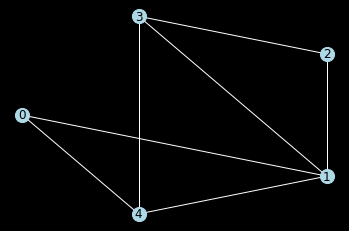

In [3]:
# One option:
"""
    - how to label the nodes: https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_labels.html
    - how to display the ambulances / calls: self.viewer.image(line_x1 + (line_x2 - line_x1)
                              * loc, line_y, ambulance, 0.02)
    - how to display the graph through the render
"""
import matplotlib.pyplot as plt


pos = nx.shell_layout(graph)
print(pos)

fig, ax = plt.subplots()
nx.draw(graph, pos, node_size=200, with_labels = True, edge_color="white", node_color="lightblue", font_color="black")
fig.set_facecolor('black')
ambulance = pyglet.image.load('./or_suite/envs/ambulance/images/ambulance.jpg')


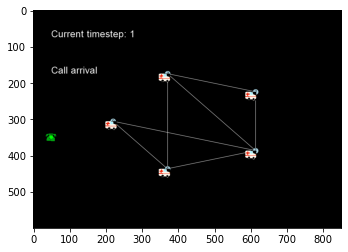

In [4]:
# Setting up viewer and rendering for the environment to test adding on the ambulances

from IPython import display as ipythondisplay
import rendering
import matplotlib.pyplot as plt
import time

def display_animation(screen, time_to_display):
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)
    if time_to_display is not None:
        ipythondisplay.display(plt.gcf())
        time.sleep(time_to_display)

        
env = gym.make('Ambulance-v1')
env.reset()

env.step([0,1])

done = False




env.viewer = rendering.PygletWindow(850, 550)
env.viewer.window.set_visible(False)


screen1, screen2, screen3 = env.render(mode='rgb_array')

# display each step of the environment for 2 seconds
display_animation(screen1, 2)
display_animation(screen2, 2)
display_animation(screen3, None)

    